<a href="https://colab.research.google.com/github/thivesh-jegadeesan/brain-stroke/blob/main/brain_stroke_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain stroke analysis**

importing the required libraries for the project

In [1]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.ensemble import (BaggingClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, HistGradientBoostingClassifier,
                              StackingClassifier, VotingClassifier, RandomForestClassifier,
                              ExtraTreesClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## 1. Data gathering

In [3]:
# df1 = pd.read_csv('/content/brain_stroke.csv')
# df2 = pd.read_csv('/content/dataset.csv')
# URL of the raw CSV file
url1 = 'https://raw.githubusercontent.com/thivesh-jegadeesan/brain-stroke/main/brain_stroke.csv'
url2 = 'https://raw.githubusercontent.com/thivesh-jegadeesan/brain-stroke/main/dataset.csv'

# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

In [4]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [5]:
df2 = df2.drop(columns=['id'])

# Replace NaN values in the 'smoking_status' column with 'Unknown'
df2['smoking_status'] = df2['smoking_status'].fillna('Unknown')

# Calculate the mean of the 'bmi' column
bmi_mean = df2['bmi'].mean()

# Replace NaN values in the 'bmi' column with the mean
df2['bmi'] = df2['bmi'].fillna(bmi_mean)

df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [6]:
stacked_df = pd.concat([df1, df2], axis=0)
stacked_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


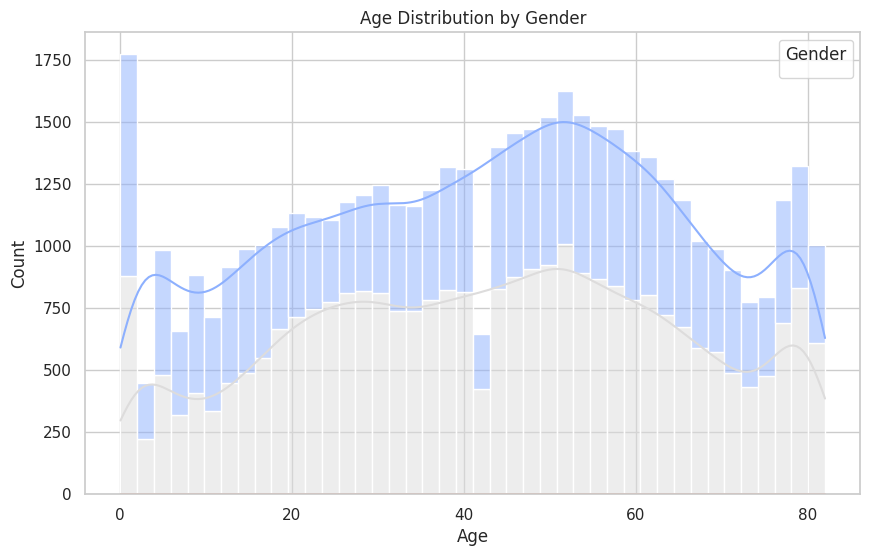

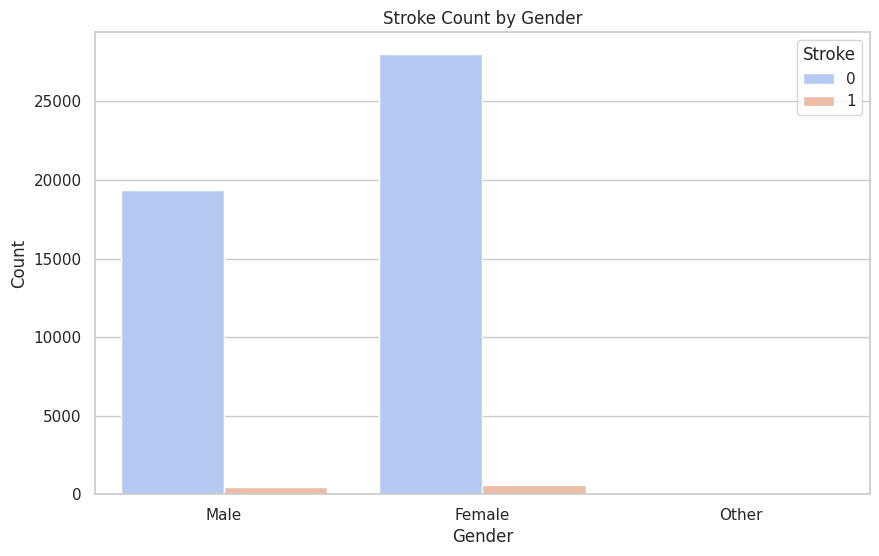

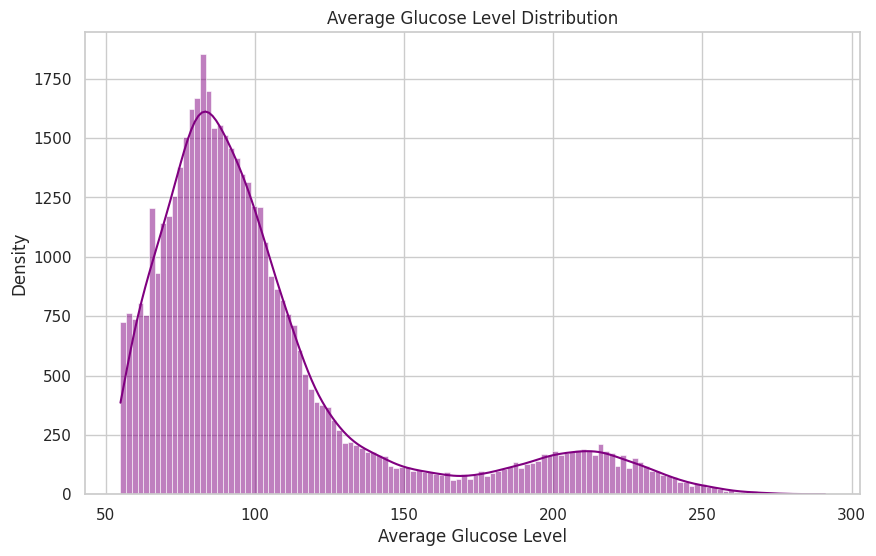

<ipython-input-7-488b9c87fd16>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stacked_df, x="stroke", y="bmi", palette="coolwarm")


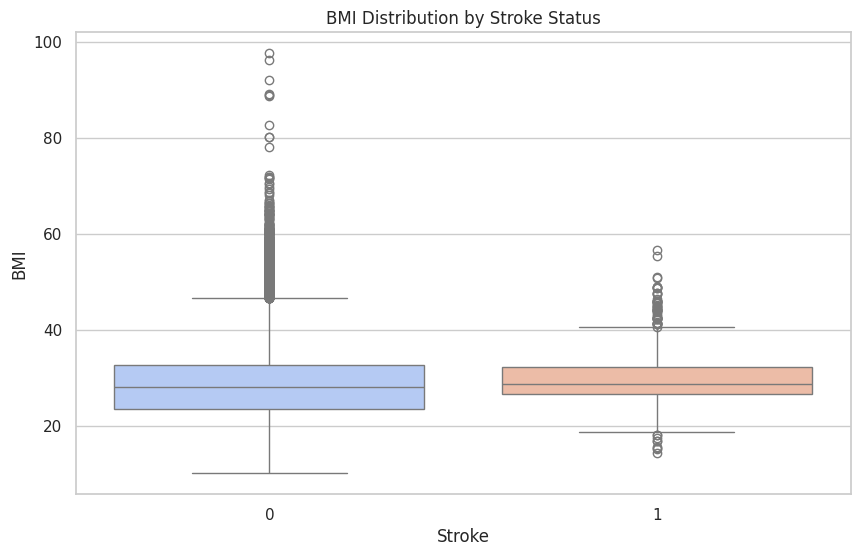

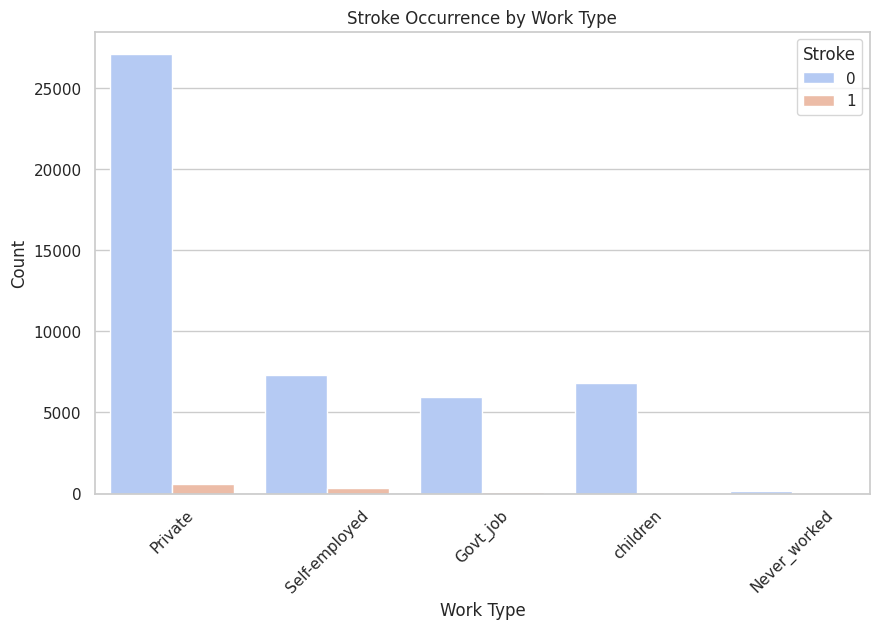

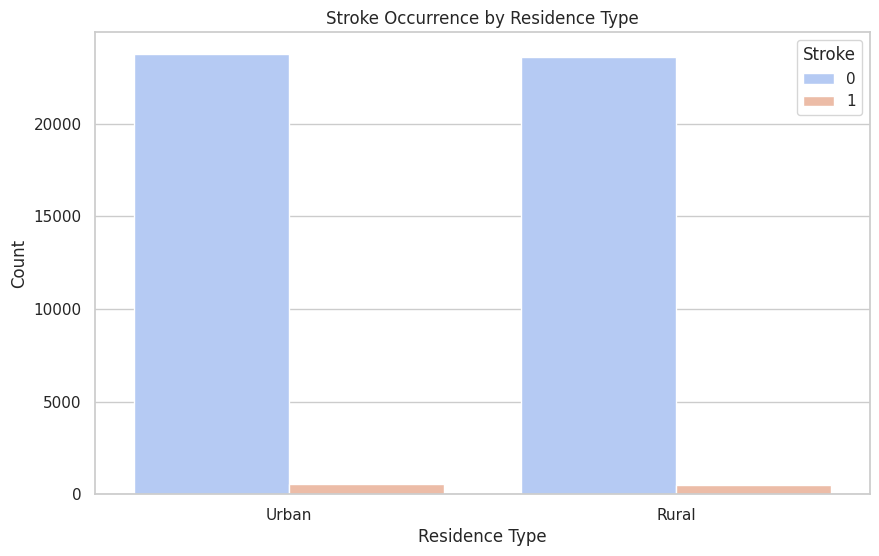

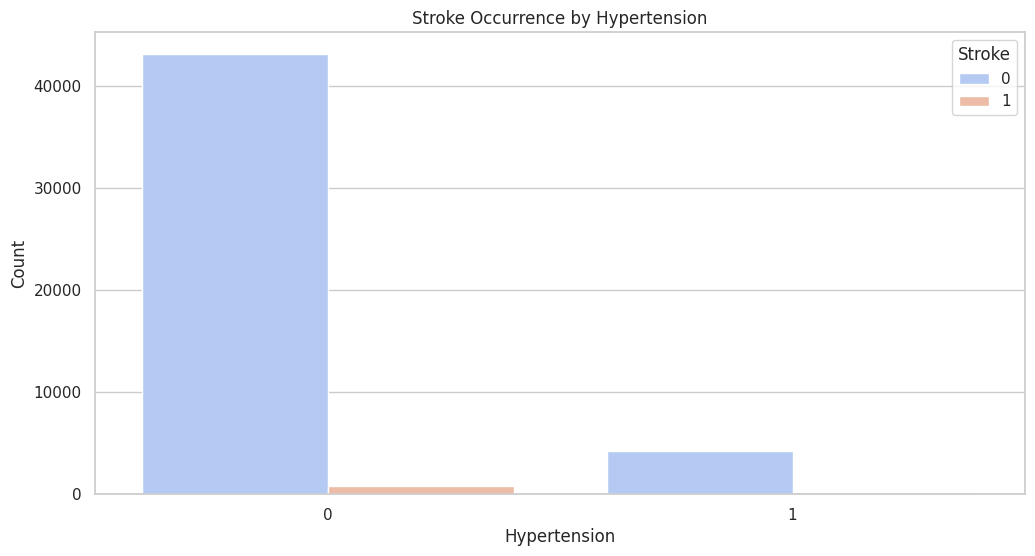

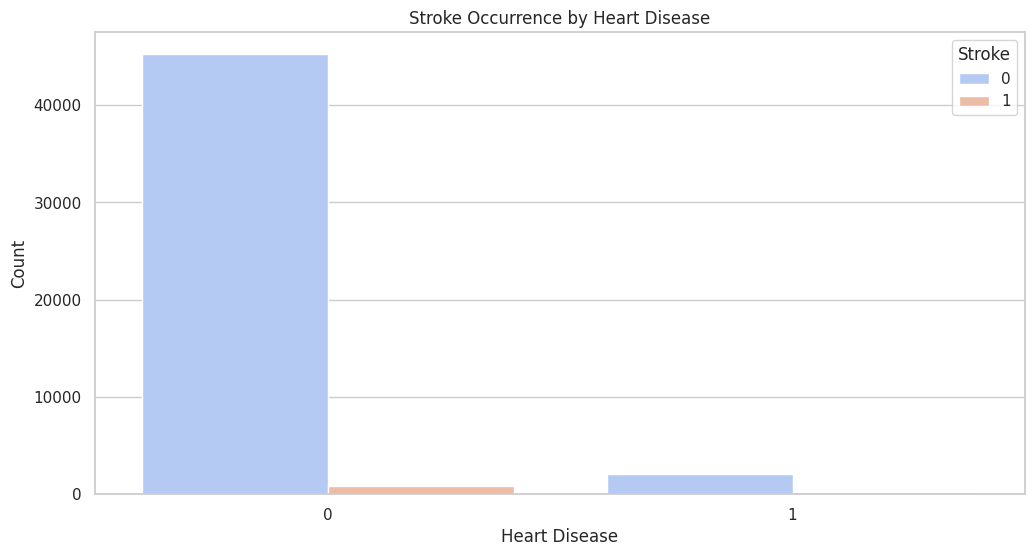

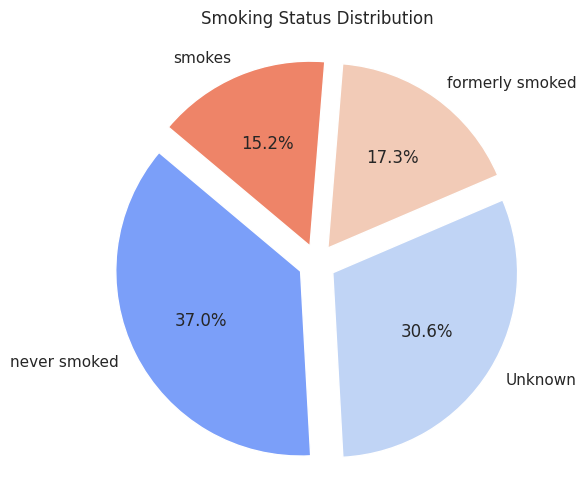

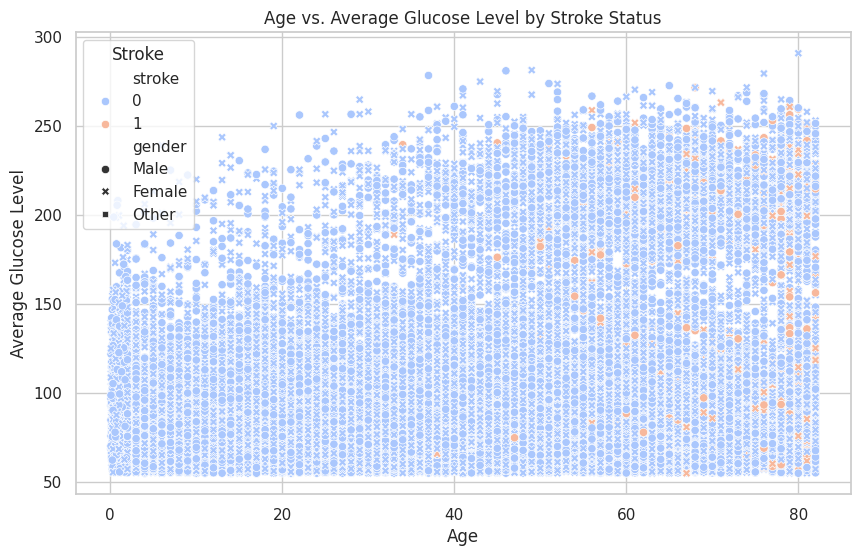

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (make sure to replace 'your_dataset.csv' with the actual path to your dataset)
# df1 = pd.read_csv('your_dataset.csv')

# Plot settings
sns.set(style="whitegrid")

# Plot 1: Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.histplot(stacked_df, x="age", hue="gender", multiple="stack", kde=True, palette="coolwarm")
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Plot 2: Stroke Count by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=stacked_df, x="gender", hue="stroke", palette="coolwarm")
plt.title('Stroke Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

# Plot 3: Average Glucose Level Distribution
plt.figure(figsize=(10, 6))
sns.histplot(stacked_df, x="avg_glucose_level", kde=True, color='purple')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.show()

# Plot 4: BMI Distribution by Stroke Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=stacked_df, x="stroke", y="bmi", palette="coolwarm")
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

# Plot 5: Stroke Occurrence by Work Type
plt.figure(figsize=(10, 6))
sns.countplot(data=stacked_df, x="work_type", hue="stroke", palette="coolwarm")
plt.title('Stroke Occurrence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.xticks(rotation=45)
plt.show()

# Plot 6: Stroke Occurrence by Residence Type
plt.figure(figsize=(10, 6))
sns.countplot(data=stacked_df, x="Residence_type", hue="stroke", palette="coolwarm")
plt.title('Stroke Occurrence by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

# Plot 7: Hypertension and Heart Disease Correlation with Stroke
# Hypertension
plt.figure(figsize=(12, 6))
sns.countplot(data=stacked_df, x="hypertension", hue="stroke", palette="coolwarm")
plt.title('Stroke Occurrence by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

# Heart Disease
plt.figure(figsize=(12, 6))
sns.countplot(data=stacked_df, x="heart_disease", hue="stroke", palette="coolwarm")
plt.title('Stroke Occurrence by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

# Plot 8: Smoking Status Distribution
plt.figure(figsize=(10, 6))
unique_smoking_status = stacked_df['smoking_status'].value_counts()
unique_smoking_status.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette("coolwarm", len(unique_smoking_status)),
    startangle=140,
    explode=[0.1] * len(unique_smoking_status)
)
plt.title('Smoking Status Distribution')
plt.ylabel('')
plt.show()

# Plot 9: Scatter Plot of Age vs. Average Glucose Level colored by Stroke Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stacked_df, x="age", y="avg_glucose_level", hue="stroke", palette="coolwarm", style="gender")
plt.title('Age vs. Average Glucose Level by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend(title='Stroke')
plt.show()



<ipython-input-8-a36c7b7c7c27>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=stacked_df, x="stroke", y="bmi", palette="coolwarm")


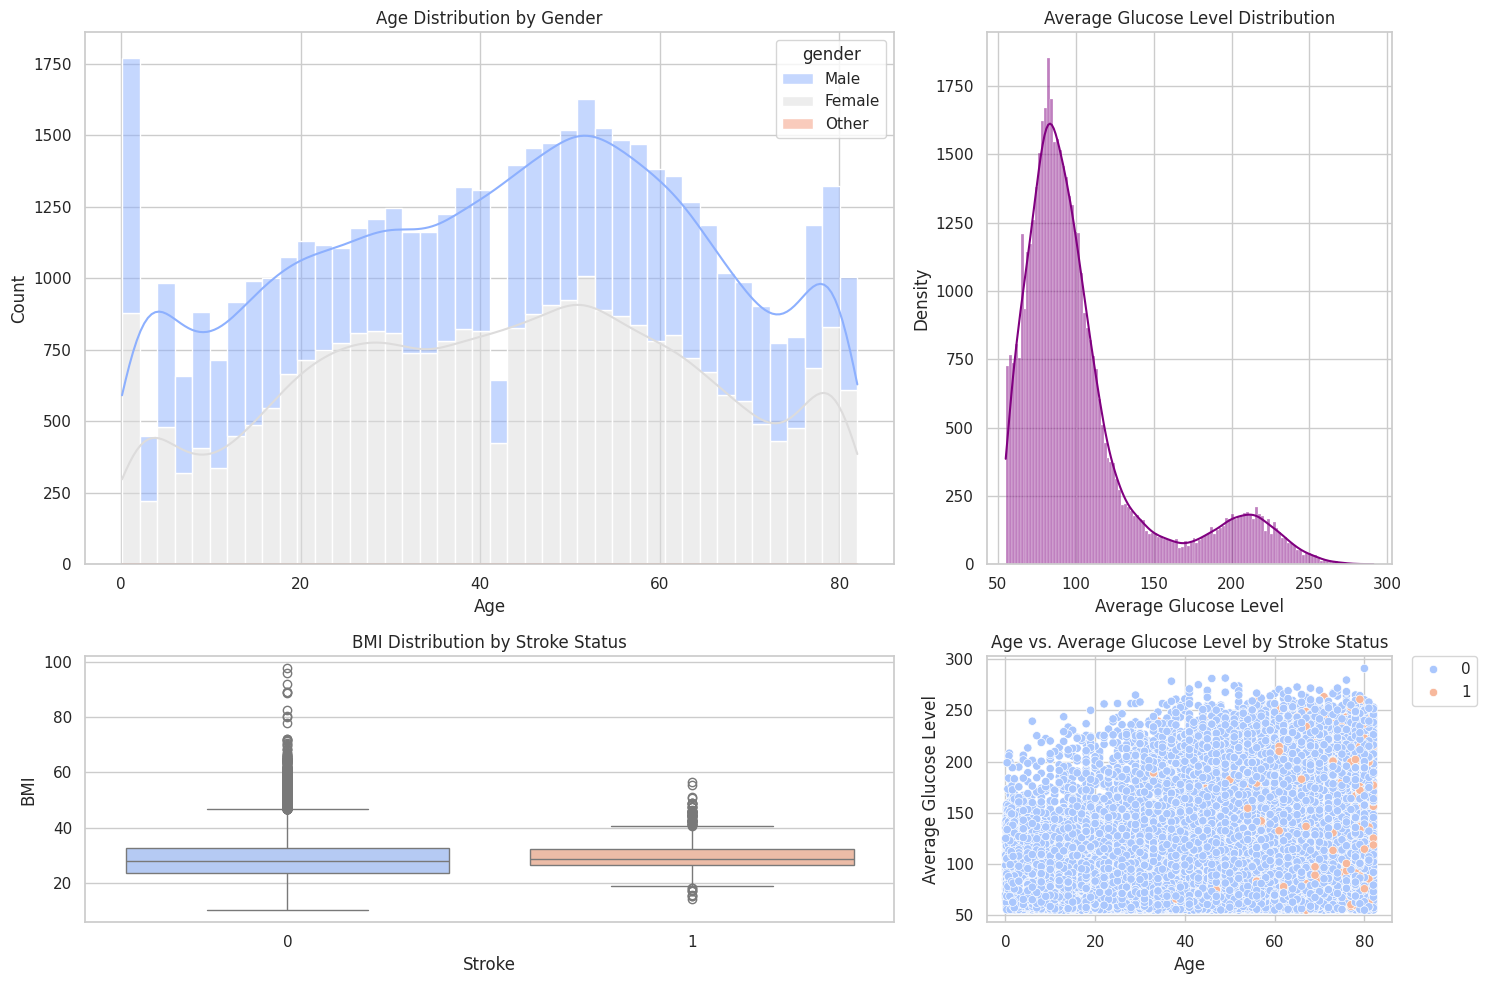

In [8]:
# Define a grid of 2x2 subplots with more space for the legend
grid_kws = {'width_ratios': (2, 1), 'height_ratios': (2, 1)}
fig, axes = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw=grid_kws)

# Plot 1: Age Distribution by Gender (top left)
sns.histplot(ax=axes[0, 0], data=stacked_df, x="age", hue="gender", multiple="stack", kde=True, palette="coolwarm")
axes[0, 0].set_title('Age Distribution by Gender')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot 3: Average Glucose Level Distribution (top right)
sns.histplot(ax=axes[0, 1], data=stacked_df, x="avg_glucose_level", kde=True, color='purple')
axes[0, 1].set_title('Average Glucose Level Distribution')
axes[0, 1].set_xlabel('Average Glucose Level')
axes[0, 1].set_ylabel('Density')

# Plot 4: BMI Distribution by Stroke Status (bottom left)
sns.boxplot(ax=axes[1, 0], data=stacked_df, x="stroke", y="bmi", palette="coolwarm")
axes[1, 0].set_title('BMI Distribution by Stroke Status')
axes[1, 0].set_xlabel('Stroke')
axes[1, 0].set_ylabel('BMI')

# Plot 9: Scatter Plot of Age vs. Average Glucose Level colored by Stroke Status (bottom right)
sns.scatterplot(ax=axes[1, 1], data=stacked_df, x="age", y="avg_glucose_level", hue="stroke", palette="coolwarm")
axes[1, 1].set_title('Age vs. Average Glucose Level by Stroke Status')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Average Glucose Level')

# Move legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
# Splitting into X and y
X = stacked_df.drop(columns=['stroke'])  # Dropping 'stroke' column to get features
y = stacked_df['stroke']

In [10]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked


In [11]:
y

0        1
1        1
2        1
3        1
4        1
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 48381, dtype: int64

In [12]:
# Define preprocessing for numerical columns (imputation + scaling)
numerical_features = ['age', 'avg_glucose_level', 'bmi']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [13]:
# Define preprocessing for categorical columns (imputation + one-hot encoding)
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [14]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [15]:
# Splitting data into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure both classes are present in training and validation set
print("Training set class distribution:", y_train_val.value_counts())
print("Test set class distribution:", y_test.value_counts())

# Splitting the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Ensure both classes are present in training and validation set
print("Training set class distribution after split:", y_train.value_counts())
print("Validation set class distribution after split:", y_val.value_counts())

# Preprocess the training data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

Training set class distribution: stroke
0    37879
1      825
Name: count, dtype: int64
Test set class distribution: stroke
0    9471
1     206
Name: count, dtype: int64
Training set class distribution after split: stroke
0    28409
1      619
Name: count, dtype: int64
Validation set class distribution after split: stroke
0    9470
1     206
Name: count, dtype: int64


In [16]:
# # Train the model on the original training data
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the model
# train_score = model.score(X_train, y_train)
# val_score = model.score(X_val, y_val)
# test_score = model.score(X_test, y_test)

# print(f'Training set score: {train_score}')
# print(f'Validation set score: {val_score}')
# print(f'Test set score: {test_score}')


In [17]:
# dt_clf = DecisionTreeClassifier()
# knn_clf = KNeighborsClassifier()
# svc_clf = SVC()

# # Create bagging classifiers with different base estimators
# bagging_dt = BaggingClassifier(base_estimator=dt_clf, n_estimators=50, random_state=42)
# bagging_knn = BaggingClassifier(base_estimator=knn_clf, n_estimators=50, random_state=42)
# bagging_svc = BaggingClassifier(base_estimator=svc_clf, n_estimators=50, random_state=42)


# models = {
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'Extra Trees': ExtraTreesClassifier(random_state=42),
#     'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
#     'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
#     'Hist Gradient Boosting': HistGradientBoostingClassifier(max_iter=50, random_state=42),
#     'XGBoost': XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'),
#     'LightGBM': LGBMClassifier(n_estimators=50, random_state=42),
#     'CatBoost': CatBoostClassifier(n_estimators=50, random_state=42, verbose=0),
#     'bagging_dt': BaggingClassifier(base_estimator=dt_clf, n_estimators=50, random_state=42),
#     'bagging_knn': BaggingClassifier(base_estimator=knn_clf, n_estimators=50, random_state=42),
#     'bagging_svc': BaggingClassifier(base_estimator=svc_clf, n_estimators=50, random_state=42),
#     'Stacking1': StackingClassifier(
#         estimators=[
#             ('rf', RandomForestClassifier(random_state=42)),
#             ('svc', SVC(probability=True, random_state=42))
#         ],
#         final_estimator=LogisticRegression()
#     ),
#     'Stacking2': StackingClassifier(
#         estimators=[
#             ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
#             ('xgb', XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'))
#         ],
#         final_estimator=LogisticRegression()
#     ),
#     'Stacking3': StackingClassifier(
#         estimators=[
#             ('knn', bagging_knn),
#             ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
#             ('mlp', MLPClassifier(max_iter=300, random_state=42))
#         ],
#         final_estimator=LogisticRegression()
#     ),
#     'Stacking4': StackingClassifier(
#         estimators=[
#             ('dt', DecisionTreeClassifier()),
#             ('knn', KNeighborsClassifier()),
#             ('svc', SVC(probability=True)),
#             ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
#             ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
#             ('mlp', MLPClassifier(max_iter=300, random_state=42))
#         ],
#         final_estimator=LogisticRegression()
#     )
# }

# # Train and evaluate models
# results = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred_val = model.predict(X_val)

#     results[name] = {
#         'val_accuracy': accuracy_score(y_val, y_pred_val),
#         'val_precision': precision_score(y_val, y_pred_val, zero_division=0),
#         'val_recall': recall_score(y_val, y_pred_val, zero_division=0),
#         'val_f1': f1_score(y_val, y_pred_val, zero_division=0),
#         'val_roc_auc': roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]) if hasattr(model, "predict_proba") else None
#     }

# # Print results
# for name, metrics in results.items():
#     print(f"\n{name}:")
#     for metric, value in metrics.items():
#         print(f"{metric}: {value:.4f}")

# # Define and train the voting classifier
# voting_clf = VotingClassifier(
#     estimators=[(name, model) for name, model in models.items()],
#     voting='soft'
# )
# voting_clf.fit(X_train, y_train)

# # Evaluate the voting classifier
# y_pred_val = voting_clf.predict(X_val)
# final_results = {
#     'val_accuracy': accuracy_score(y_val, y_pred_val),
#     'val_precision': precision_score(y_val, y_pred_val, zero_division=0),
#     'val_recall': recall_score(y_val, y_pred_val, zero_division=0),
#     'val_f1': f1_score(y_val, y_pred_val, zero_division=0),
#     'val_roc_auc': roc_auc_score(y_val, voting_clf.predict_proba(X_val)[:, 1])
# }

# # Print final results
# print("\nVoting Classifier:")
# for metric, value in final_results.items():
#     print(f"{metric}: {value:.4f}")

# # Final prediction on test set
# y_pred_test = voting_clf.predict(X_test)
# test_results = {
#     'test_accuracy': accuracy_score(y_test, y_pred_test),
#     'test_precision': precision_score(y_test, y_pred_test, zero_division=0),
#     'test_recall': recall_score(y_test, y_pred_test, zero_division=0),
#     'test_f1': f1_score(y_test, y_pred_test, zero_division=0),
#     'test_roc_auc': roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])
# }

# # Print test results
# print("\nTest Set Results:")
# for metric, value in test_results.items():
#     print(f"{metric}: {value:.4f}")

In [18]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(max_iter=50, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(n_estimators=50, random_state=42),
    'CatBoost': CatBoostClassifier(n_estimators=50, random_state=42, verbose=0),
    'bagging_dt': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    'bagging_knn': BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50, random_state=42),
    'bagging_svc': BaggingClassifier(base_estimator=SVC(probability=True), n_estimators=50, random_state=42),
    'Stacking1': StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        final_estimator=LogisticRegression()
    ),
    'Stacking2': StackingClassifier(
        estimators=[
            ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
            ('xgb', XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'))
        ],
        final_estimator=LogisticRegression()
    ),
    'Stacking3': StackingClassifier(
        estimators=[
            ('knn', BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
            ('mlp', MLPClassifier(max_iter=300, random_state=42))
        ],
        final_estimator=LogisticRegression()
    ),
    'Stacking4': StackingClassifier(
        estimators=[
            ('dt', DecisionTreeClassifier()),
            ('knn', KNeighborsClassifier()),
            ('svc', SVC(probability=True)),
            ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
            ('mlp', MLPClassifier(max_iter=300, random_state=42))
        ],
        final_estimator=LogisticRegression()
    )
}

In [19]:
# Define hyperparameter grids for GridSearchCV
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'Extra Trees': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    'Hist Gradient Boosting': {
        'max_iter': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [None, 10, 20]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'num_leaves': [31, 50, 100]
    },
    'CatBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'bagging_dt': {
        'n_estimators': [50, 100, 200],
        'base_estimator__max_depth': [None, 10, 20]
    },
    'bagging_knn': {
        'n_estimators': [50, 100, 200],
        'base_estimator__n_neighbors': [3, 5, 7]
    },
    'bagging_svc': {
        'n_estimators': [50, 100, 200],
        'base_estimator__C': [0.1, 1, 10]
    }
}


In [20]:

# Train and evaluate models before tuning
results_before_tuning = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)

    # Handle ROC AUC calculation carefully for multi-class
    if hasattr(model, "predict_proba"):
        if len(set(y)) <= 2:  # Binary classification
            y_proba = model.predict_proba(X_val)[:, 1]
            val_roc_auc = roc_auc_score(y_val, y_proba)
        else:  # Multi-class classification
            y_proba = model.predict_proba(X_val)
            val_roc_auc = roc_auc_score(y_val, y_proba, multi_class='ovr')
    else:
        val_roc_auc = None

    results_before_tuning[name] = {
        'val_accuracy': accuracy_score(y_val, y_pred_val),
        'val_precision': precision_score(y_val, y_pred_val, average='weighted', zero_division=0),
        'val_recall': recall_score(y_val, y_pred_val, average='weighted', zero_division=0),
        'val_f1': f1_score(y_val, y_pred_val, average='weighted', zero_division=0),
        'val_roc_auc': val_roc_auc
    }


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:25:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 619, number of negative: 28409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 29028, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021324 -> initscore=-3.826356
[LightGBM] [Info] Start training from score -3.826356


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/l

In [21]:

# Print results before tuning
print("Results before tuning:")
for name, metrics in results_before_tuning.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Results before tuning:

Random Forest:
val_accuracy: 0.9842
val_precision: 0.9834
val_recall: 0.9842
val_f1: 0.9800
val_roc_auc: 0.8434

Extra Trees:
val_accuracy: 0.9833
val_precision: 0.9805
val_recall: 0.9833
val_f1: 0.9796
val_roc_auc: 0.8168

AdaBoost:
val_accuracy: 0.9787
val_precision: 0.9579
val_recall: 0.9787
val_f1: 0.9682
val_roc_auc: 0.8352

Gradient Boosting:
val_accuracy: 0.9780
val_precision: 0.9579
val_recall: 0.9780
val_f1: 0.9678
val_roc_auc: 0.8502

Hist Gradient Boosting:
val_accuracy: 0.9787
val_precision: 0.9579
val_recall: 0.9787
val_f1: 0.9682
val_roc_auc: 0.8595

XGBoost:
val_accuracy: 0.9786
val_precision: 0.9651
val_recall: 0.9786
val_f1: 0.9683
val_roc_auc: 0.8586

LightGBM:
val_accuracy: 0.9786
val_precision: 0.9579
val_recall: 0.9786
val_f1: 0.9681
val_roc_auc: 0.8618

CatBoost:
val_accuracy: 0.9786
val_precision: 0.9651
val_recall: 0.9786
val_f1: 0.9683
val_roc_auc: 0.8571

bagging_dt:
val_accuracy: 0.9843
val_precision: 0.9840
val_recall: 0.9843
val_f1: 

In [ ]:
# Hyperparameter tuning with GridSearchCV
tuned_models = {}
for name, model in models.items():
    param_grid = param_grids.get(name, {})
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        tuned_models[name] = grid_search.best_estimator_


In [ ]:

# Train and evaluate models after tuning
results_after_tuning = {}
for name, model in tuned_models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)

    # Handle ROC AUC calculation carefully for multi-class
    if hasattr(model, "predict_proba"):
        if len(set(y)) <= 2:  # Binary classification
            y_proba = model.predict_proba(X_val)[:, 1]
            val_roc_auc = roc_auc_score(y_val, y_proba)
        else:  # Multi-class classification
            y_proba = model.predict_proba(X_val)
            val_roc_auc = roc_auc_score(y_val, y_proba, multi_class='ovr')
    else:
        val_roc_auc = None

    results_after_tuning[name] = {
        'val_accuracy': accuracy_score(y_val, y_pred_val),
        'val_precision': precision_score(y_val, y_pred_val, average='weighted', zero_division=0),
        'val_recall': recall_score(y_val, y_pred_val, average='weighted', zero_division=0),
        'val_f1': f1_score(y_val, y_pred_val, average='weighted', zero_division=0),
        'val_roc_auc': val_roc_auc
    }


In [ ]:

# Print results after tuning
print("Results after tuning:")
for name, metrics in results_after_tuning.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


In [ ]:

# Define and train the voting classifier with tuned models
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in tuned_models.items()],
    voting='soft'
)
voting_clf.fit(X_train, y_train)


In [ ]:

# Evaluate the voting classifier on validation set
y_pred_val = voting_clf.predict(X_val)
final_results = {
    'val_accuracy': accuracy_score(y_val, y_pred_val),
    'val_precision': precision_score(y_val, y_pred_val, average='weighted', zero_division=0),
    'val_recall': recall_score(y_val, y_pred_val, average='weighted', zero_division=0),
    'val_f1': f1_score(y_val, y_pred_val, average='weighted', zero_division=0),
    'val_roc_auc': roc_auc_score(y_val, voting_clf.predict_proba(X_val), multi_class='ovr')
}


In [ ]:

# Print final results for the voting classifier
print("\nVoting Classifier (after tuning):")
for metric, value in final_results.items():
    print(f"{metric}: {value:.4f}")


In [ ]:

# Final prediction on test set
y_pred_test = voting_clf.predict(X_test)
test_results = {
    'test_accuracy': accuracy_score(y_test, y_pred_test),
    'test_precision': precision_score(y_test, y_pred_test, average='weighted', zero_division=0),
    'test_recall': recall_score(y_test, y_pred_test, average='weighted', zero_division=0),
    'test_f1': f1_score(y_test, y_pred_test, average='weighted', zero_division=0),
    'test_roc_auc': roc_auc_score(y_test, voting_clf.predict_proba(X_test), multi_class='ovr')
}


In [ ]:

# Print test results
print("\nTest Set Results:")
for metric, value in test_results.items():
    print(f"{metric}: {value:.4f}")
